# A Flight Price Prediction Model 
A Flight Price Prediction designed to analyze and predict the cost of airline tickets.The model is trained using historical data to identify patterns and relationships between these factors and the price of tickets.
Once the model is trained, it can be used to make predictions on future ticket prices.

The model typically consists of several components, including data collection, data preprocessing, feature extraction, model training, and prediction. The data collection process involves gathering relevant data from various sources, such as airlines, travel agencies, and online travel portals. The data is then preprocessed to remove any inconsistencies and ensure its accuracy.

This Data is of Airline Operations from 01-03-2019 to 09-06-2019.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("Data_Train.xlsx")

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# This Data is of Airline Operations from 01-03-2019 to 09-06-2019 

In [4]:
df["Date_of_Journey"].max()

'9/06/2019'

In [5]:
df["Date_of_Journey"].min()

'01/03/2019'

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Null Values

In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

# Droping Null Values 
As they are less than 3% of data we are drop null values.

In [8]:
df.dropna(inplace=True)

# Converting Date of Journey into Numerical attributes

In [9]:
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [10]:
df.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Converting Depature Time into Numerical attributes

In [11]:
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df.drop(["Dep_Time"], axis = 1, inplace = True)

# Converting Arrival Time into Numerical attributes

In [12]:
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute
df.drop(["Arrival_Time"], axis = 1, inplace = True)

# Converting Duration of Flight into Numerical attributes

In [13]:
duration = list(df["Duration"])

In [14]:
len(duration[0].split())

2

In [15]:
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:  
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m" 
        else:
            duration[i] = "0h " + duration[i]      

duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0])) 
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 
    
    
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [16]:
df.drop(["Duration"], axis = 1, inplace = True)

# Number of flight operations by specific Airline

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


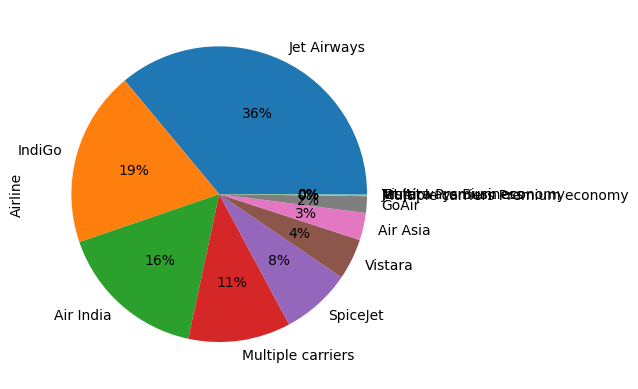

In [17]:
print(df["Airline"].value_counts())
df["Airline"].value_counts().plot(kind='pie', y='SOURCE', autopct='%1.0f%%')
plt.show()

# Outliers between Airlines Compared to price

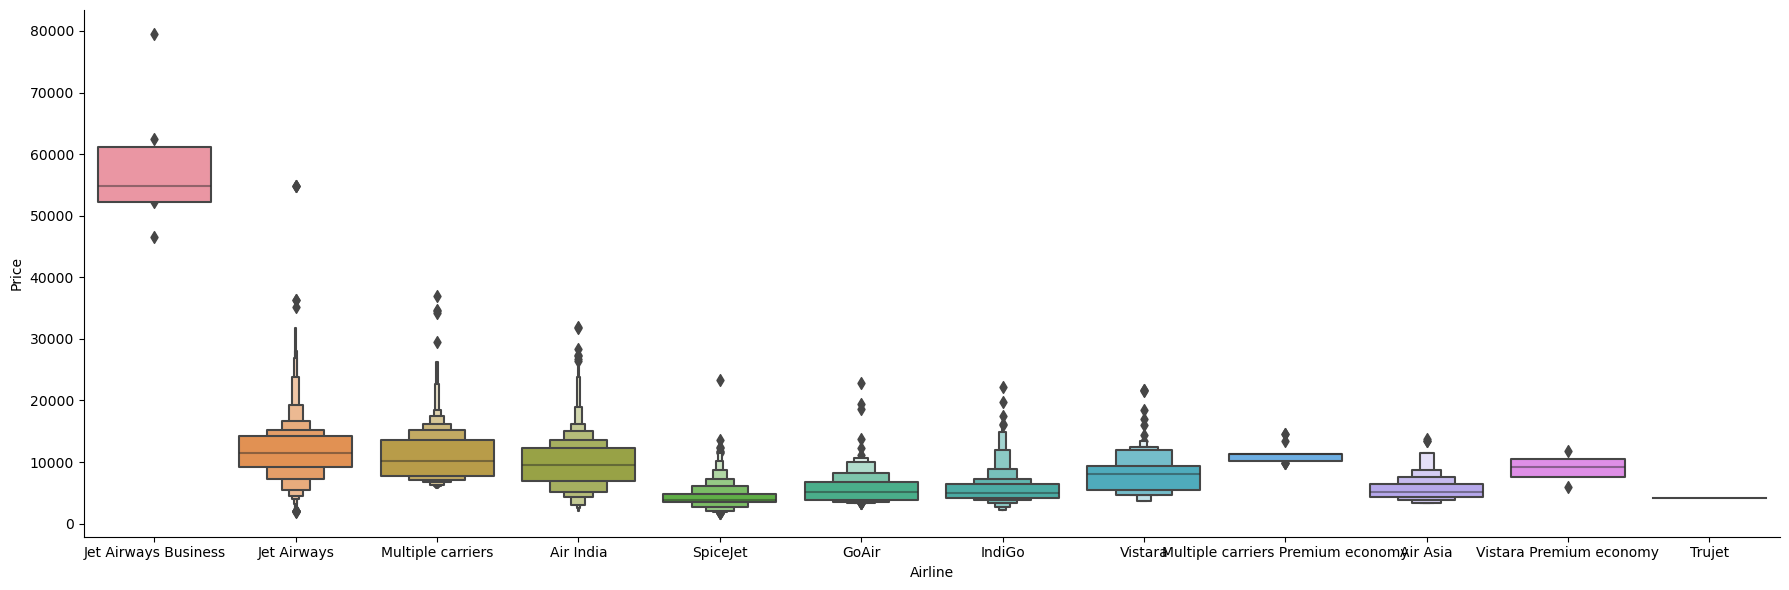

In [18]:
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

# Number of Airline Operations from Source

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


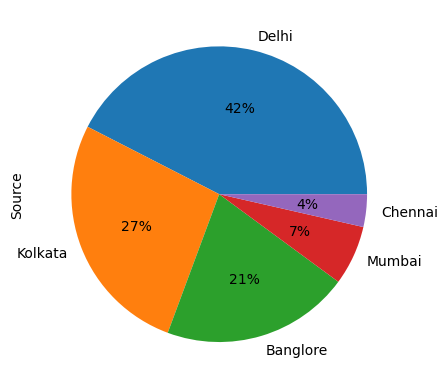

In [19]:
print(df["Source"].value_counts())
df["Source"].value_counts().plot(kind='pie', y='SOURCE', autopct='%1.0f%%')
plt.show()

# Outliers in source city compared to price 

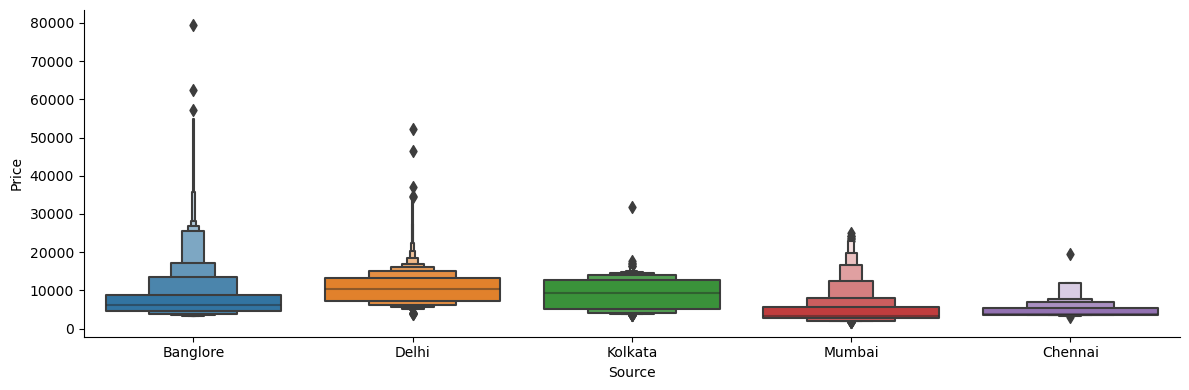

In [20]:
sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

# Number of Airline Operations from Destination Cities 

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


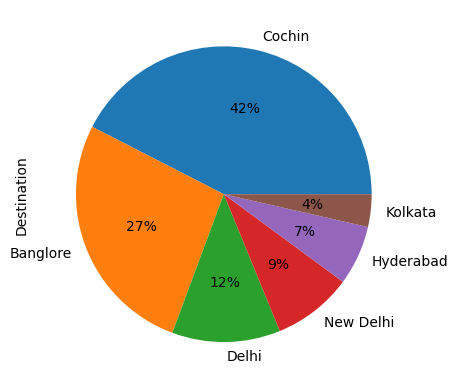

In [21]:
print(df["Destination"].value_counts())
df["Destination"].value_counts().plot(kind='pie', y='DESTINATION', autopct='%1.0f%%')
plt.show()

# Outliers in Destination city compared to price

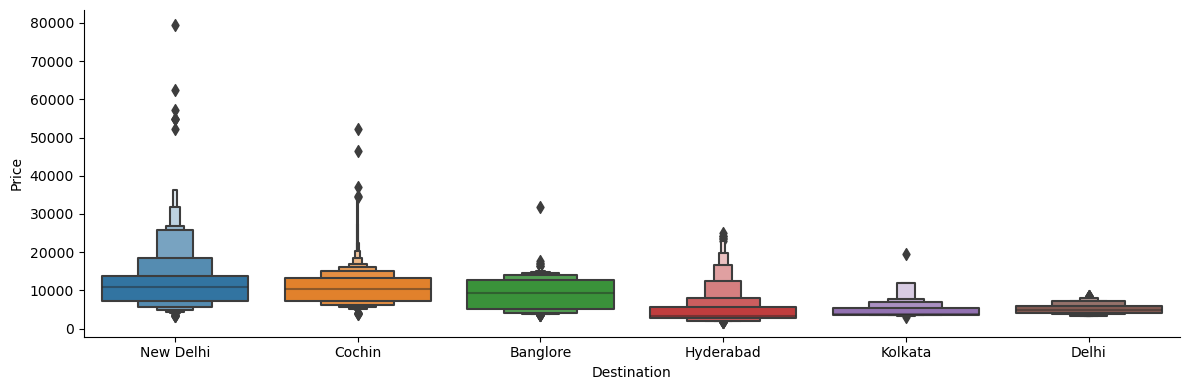

In [22]:
sns.catplot(y = "Price", x = "Destination", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

# Droping Route and Additional info 
Additional_Info contains almost 80% no_info

Route and Total_Stops are related to each other

In [23]:
df["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [24]:
df.drop(["Route", "Additional_Info"],axis=1,inplace=True)

# Converting Total Stops column into Numerical attributes

In [25]:
df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [26]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [27]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


# The least ticket prices during whole period.

In [28]:
TM = df["Price"].min()
df[df["Price"]==TM]

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
4066,SpiceJet,Mumbai,Hyderabad,0,1759,21,3,22,45,0,10,1,25
4274,SpiceJet,Mumbai,Hyderabad,0,1759,27,3,22,45,0,10,1,25
4839,SpiceJet,Mumbai,Hyderabad,0,1759,3,4,22,45,0,15,1,30
10513,SpiceJet,Mumbai,Hyderabad,0,1759,27,3,5,45,7,5,1,20


# The Max ticket prices during whole period.

In [29]:
TMX = df["Price"].max()
df[df["Price"]==TMX]

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
2924,Jet Airways Business,Banglore,New Delhi,1,79512,1,3,5,45,11,25,5,40


# Average prices of flight by months 

Journey_month
3    10673.205580
4     5770.847081
5     9127.722944
6     8828.796134
Name: Price, dtype: float64


<AxesSubplot:ylabel='Price'>

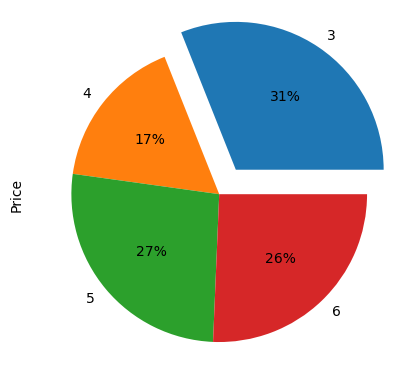

In [30]:
A = df.groupby(["Journey_month"],sort=True).mean()
print(A["Price"])
expl = [0.2,0,0,0]
A["Price"].plot(kind='pie', y='Price', autopct='%1.0f%%',explode = expl)

# Average prices of flight by Hours

Arrival_hour
0      5642.447205
1      9657.563327
2      5151.886076
3      4934.638298
4     11485.781623
5     15369.855072
6      5799.423077
7      7837.741007
8      8047.191083
9      9203.018405
10     8124.470588
11     7415.758389
12     9686.433668
13     7575.480519
14     6623.430508
15     8925.412088
16     9272.121622
17     5820.633508
18    10591.204280
19    10972.746617
20     8267.570292
21     8672.246088
22     7575.047913
23     8946.379381
Name: Price, dtype: float64


<AxesSubplot:ylabel='Price'>

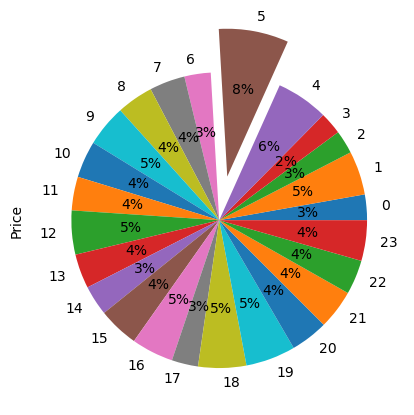

In [31]:
A = df.groupby(["Arrival_hour"],sort=True).mean()
print(A["Price"])
expl = [0,0,0,0,0,0.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
A["Price"].plot(kind='pie', y='Price', autopct='%1.0f%%',explode = expl)

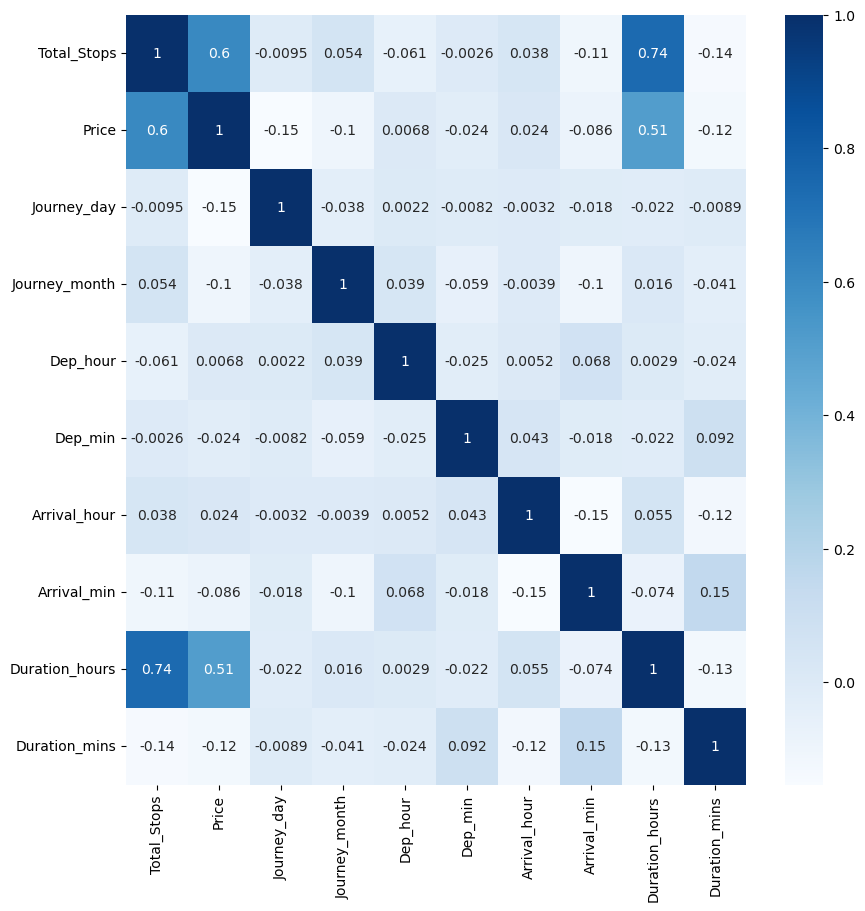

In [32]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, cmap = "Blues")
plt.show()

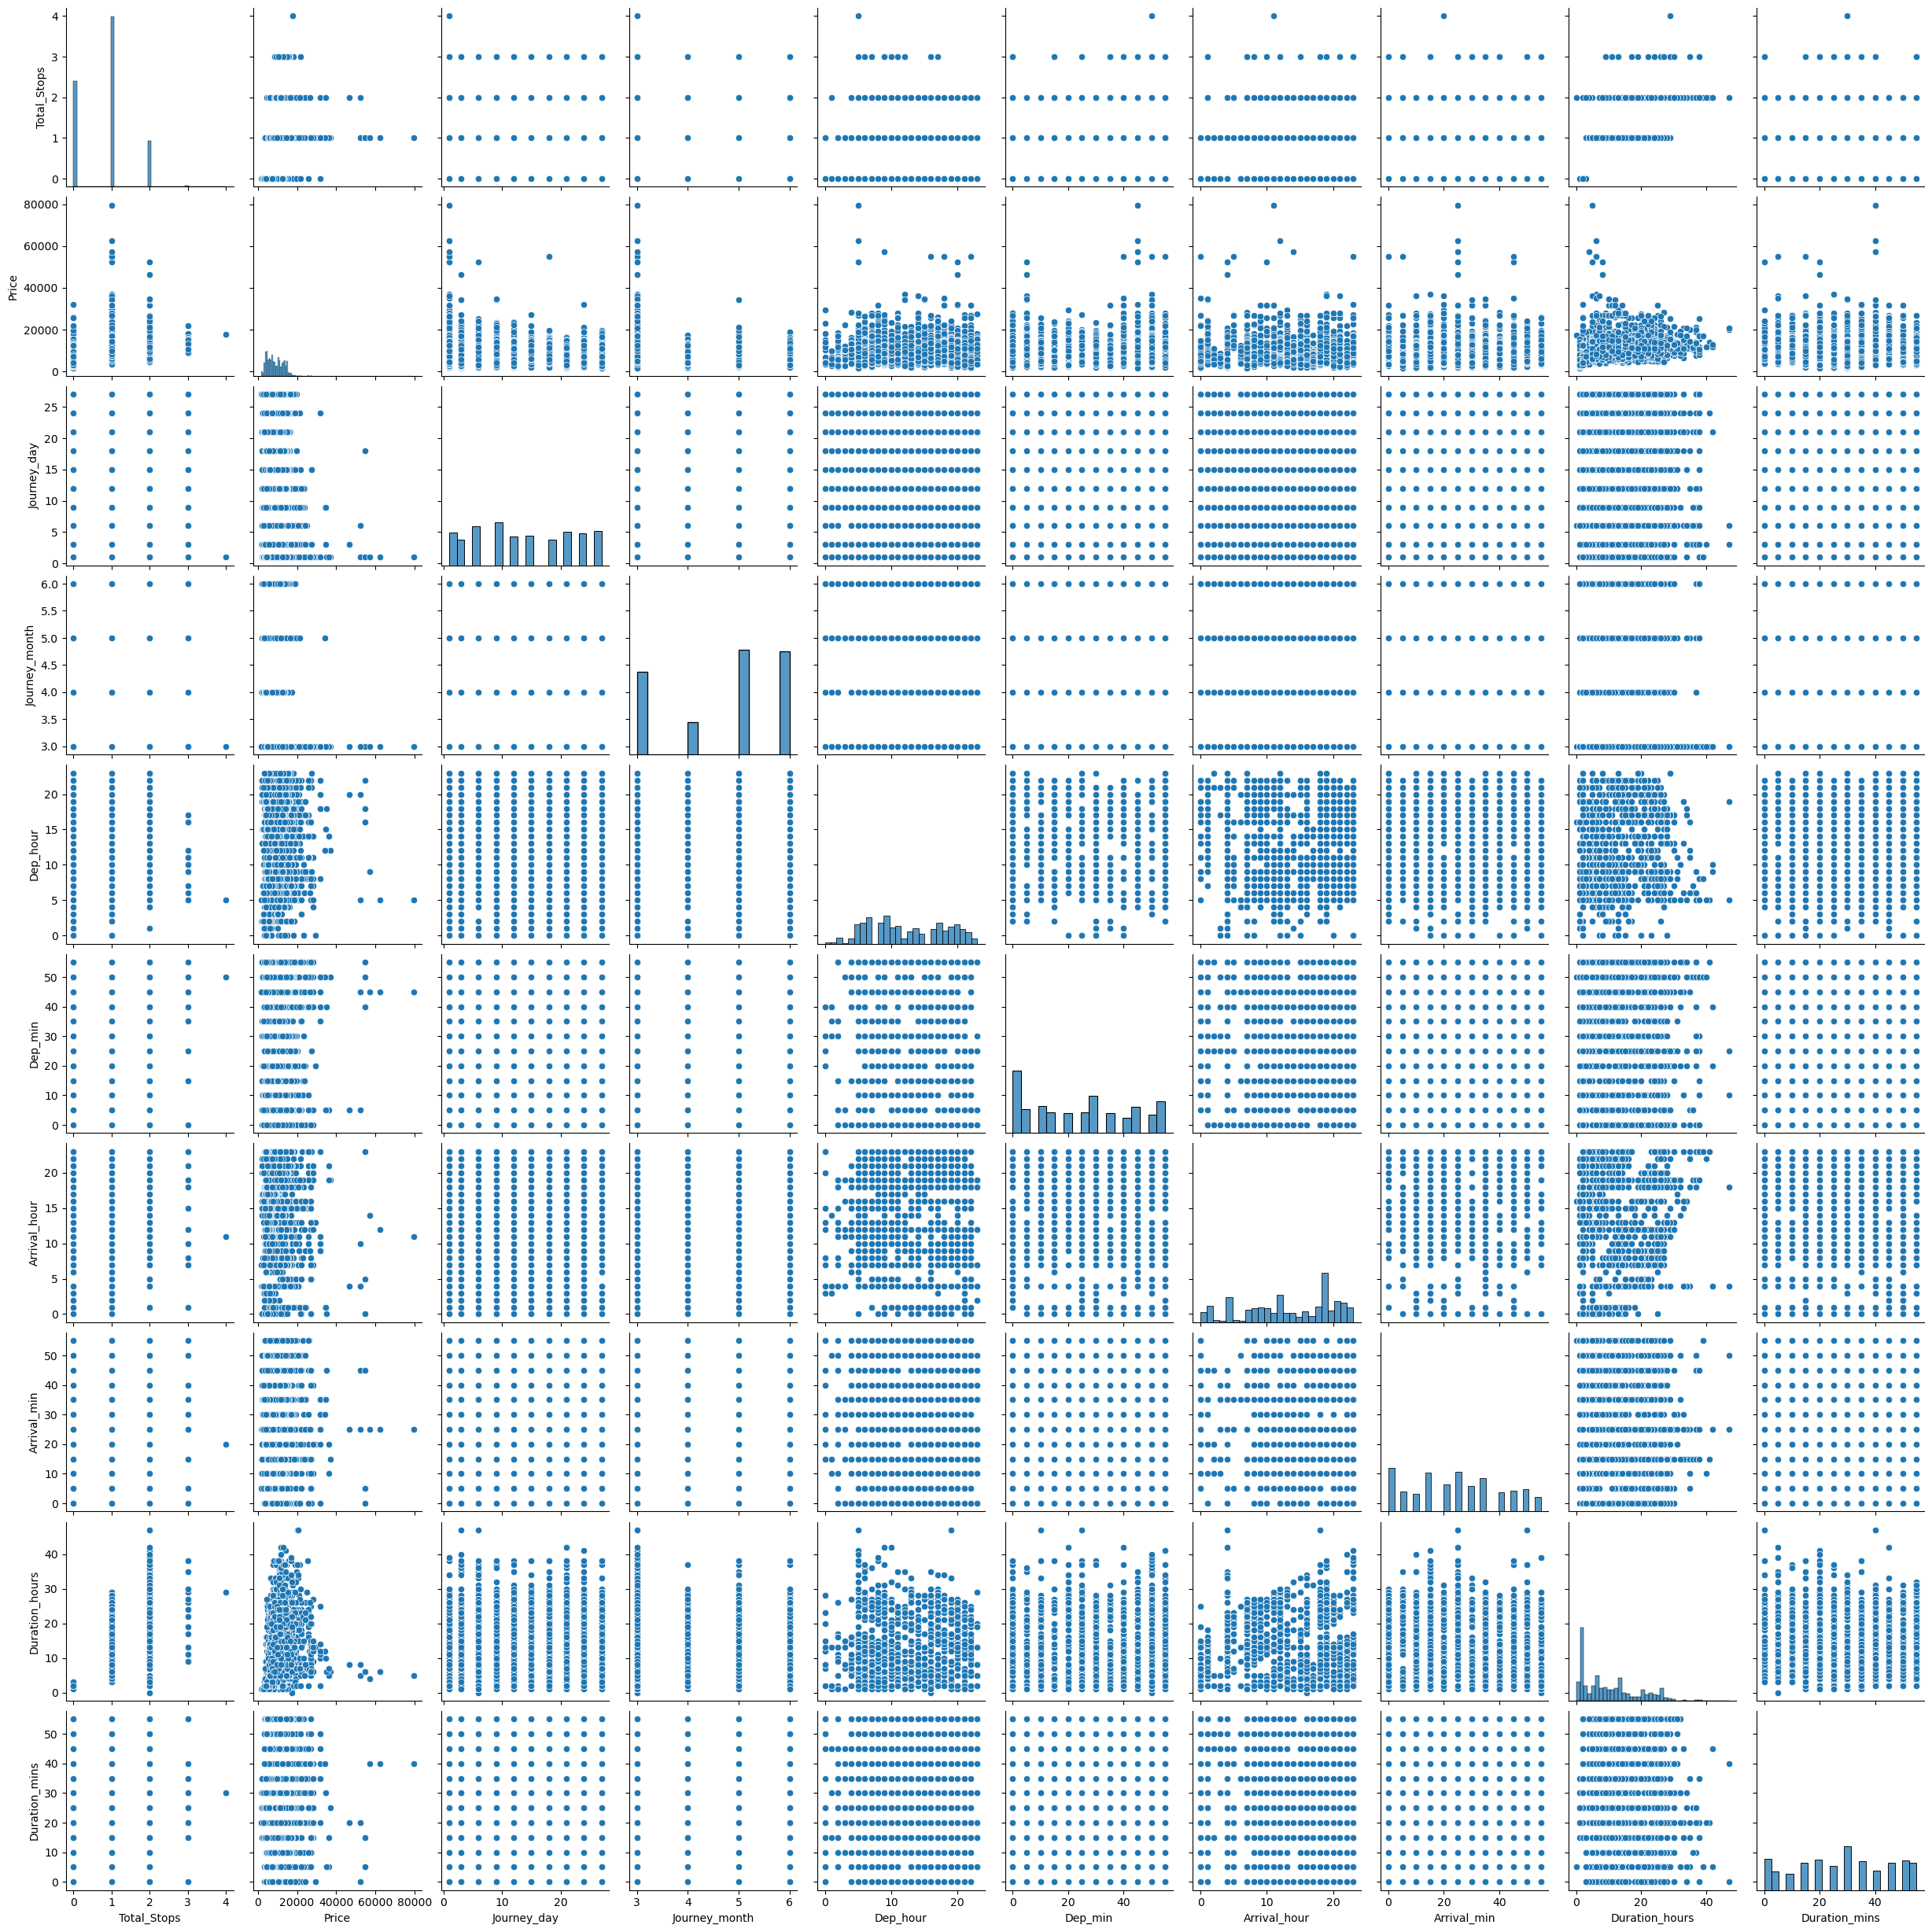

In [33]:
sns.pairplot(df)

# Encoding Categorical Values 

In [34]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()

df[["Source","Destination","Airline"]] = OE.fit_transform(df[["Source","Destination","Airline"]])

# Spliting X and Y 

In [35]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_hours', 'Duration_mins'],
      dtype='object')

In [36]:
X = df.loc[:,['Airline','Source', 'Destination', 'Total_Stops','Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_hours', 'Duration_mins']]

In [37]:
Y = df.iloc[:,4]
Y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

# Spliting Training and Testing Data

In [38]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=1)

# Scaling Data Using Standard Scaler

In [39]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
xtrain = ss.fit_transform(xtrain)
xtest = ss.fit_transform(xtest)

# Created a Function to implement Algorithms

In [40]:
def mymodel(model):
    
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    training = model.score(xtrain,ytrain)
    testing = model.score(xtest,ytest)
    print()
    mae=mean_absolute_error(ytest,ypred)
    mse=mean_squared_error(ytest,ypred)
    rmse=np.sqrt(mse)
    r2=r2_score(ytest,ypred)
    print(f"MAE:- {mae}\nMSE:- {mse}\nRMSE:- {rmse}\nAccuracy:- {r2}")
    print()
    print(f"Training Error of model is {training}")
    print(f"Testing Error of model is {testing}")
    print()
    print(plt.scatter(ytest,ypred))
    plt.show()
    print()
    print(sns.distplot((ytest-ypred)))
    plt.show()
    return model

# Created a Model using LINEAR REGRESSION

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


MAE:- 2447.7319425947207
MSE:- 11391461.013739957
RMSE:- 3375.1238516149238
Accuracy:- 0.4446086023196977

Training Error of model is 0.4345788822406066
Testing Error of model is 0.4446086023196977



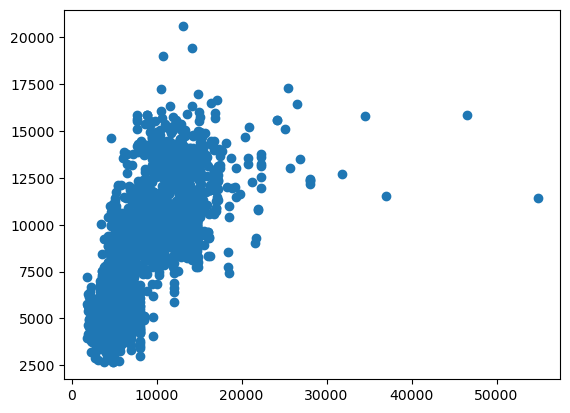


AxesSubplot(0.125,0.11;0.775x0.77)


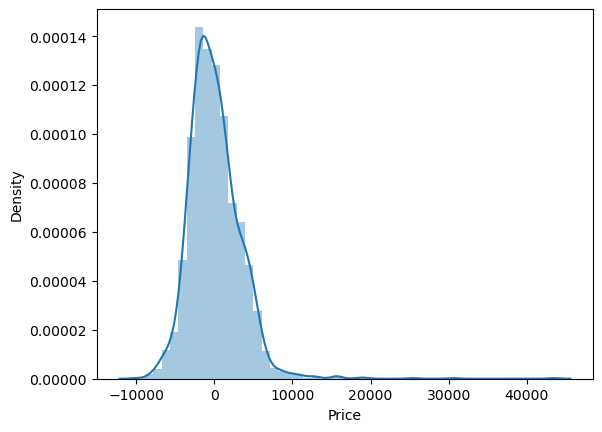

LinearRegression()

In [42]:
mymodel(LinearRegression())

# Created a Model Using RANDOM FOREST REGRESSOR


MAE:- 1213.5347153642385
MSE:- 4032674.3712970787
RMSE:- 2008.1519791333221
Accuracy:- 0.8033867075730882

Training Error of model is 0.9527439236868568
Testing Error of model is 0.8033867075730882



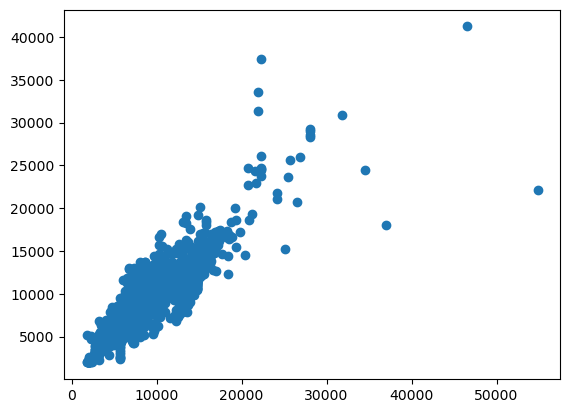


AxesSubplot(0.125,0.11;0.775x0.77)


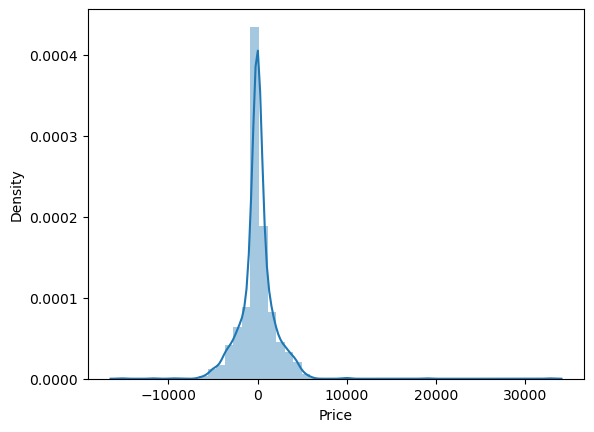

RandomForestRegressor()

In [43]:
from sklearn.ensemble import RandomForestRegressor
mymodel(RandomForestRegressor())

# Implementing Hyperparameter Tunning using RANDOMIZED SEARCH CV

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=600; total time=  15.4s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=600; total time=  15.8s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=600; total time=  16.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=600; total time=  14.4s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=600; total time=  13.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   6.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   6.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_esti

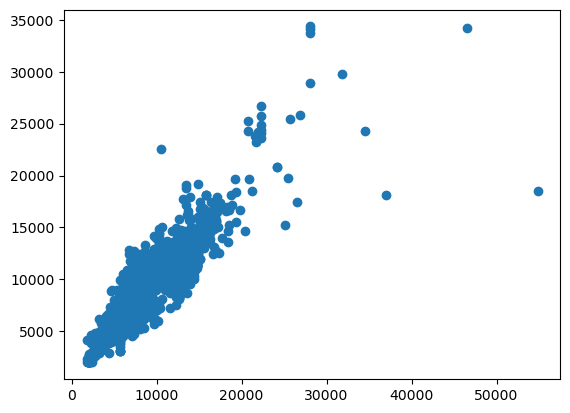


AxesSubplot(0.125,0.11;0.775x0.77)


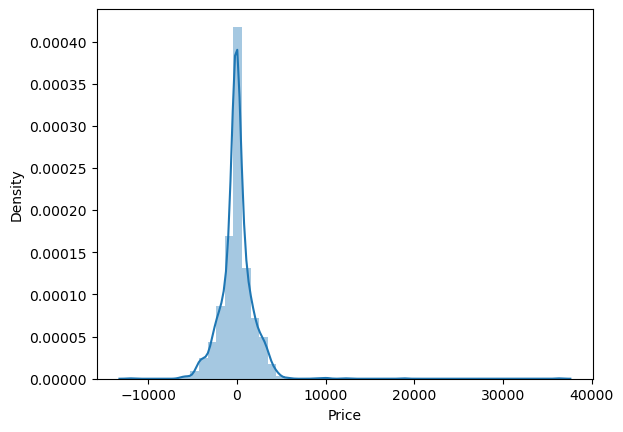

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [44]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2)

mymodel(rf_random)

In [45]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 25}

In [46]:
Best_rf = rf_random.best_estimator_

# The Final Model Using RANDOM FOREST REGRESSOR and parameters from Hyperparameter Tunning using RANDOMIZED SEARCH CV


MAE:- 1163.0400932090806
MSE:- 3639611.1308344803
RMSE:- 1907.7764886994703
Accuracy:- 0.8225505305659389

Training Error of model is 0.8964367686335428
Testing Error of model is 0.8225505305659389



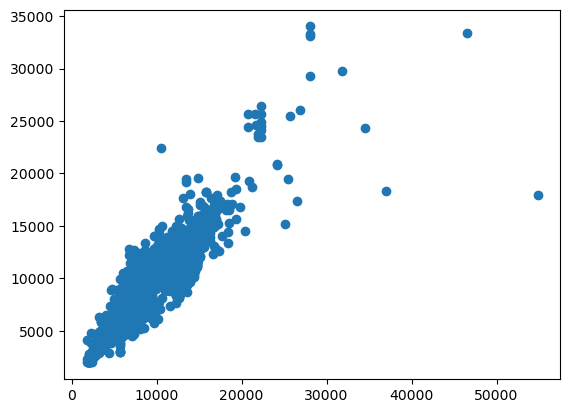


AxesSubplot(0.125,0.11;0.775x0.77)


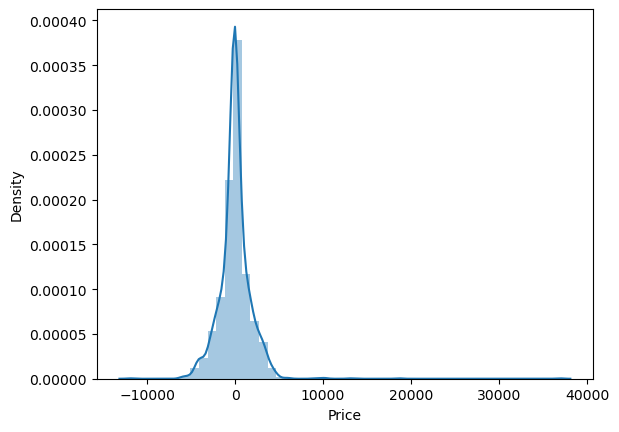

RandomForestRegressor(max_depth=25, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=400)

In [47]:
mymodel(Best_rf)

# Conclusion :-
# The Best Predicting Model is RANDOM FOREST REGRESSOR with Hyperparameter Tunning using RANDOMIZED SEARCH CV giving an Accuracy Rate of 82%.